<a href="https://colab.research.google.com/github/HinePo/Heart-disease-classification-and-Hyper-Parameter-tuning/blob/master/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification and Hyper-Parameter Optimization

In this kernel I will try to find the best model to predict heart disease. It is a classification problem (person has heart disease? yes or no), and I will do some tests and analysis on the models and hyper parameters.

Dataset:
https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the data

In [2]:
df = pd.read_csv('/content/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Overview and Exploration

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# there are no missing values on the dataset
df.isnull().values.any()

False

In [6]:
df.shape

(303, 14)

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
# unique values on column 'cp'
set(df.cp)

{0, 1, 2, 3}

In [9]:
# group by 'cp'
df.groupby('cp').count()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
cp,,,,,,,,,,,,,
0,143,143,143,143,143,143,143,143,143,143,143,143,143
1,50,50,50,50,50,50,50,50,50,50,50,50,50
2,87,87,87,87,87,87,87,87,87,87,87,87,87
3,23,23,23,23,23,23,23,23,23,23,23,23,23


In [10]:
df.groupby('target').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,138,138,138,138,138,138,138,138,138,138,138,138,138
1,165,165,165,165,165,165,165,165,165,165,165,165,165


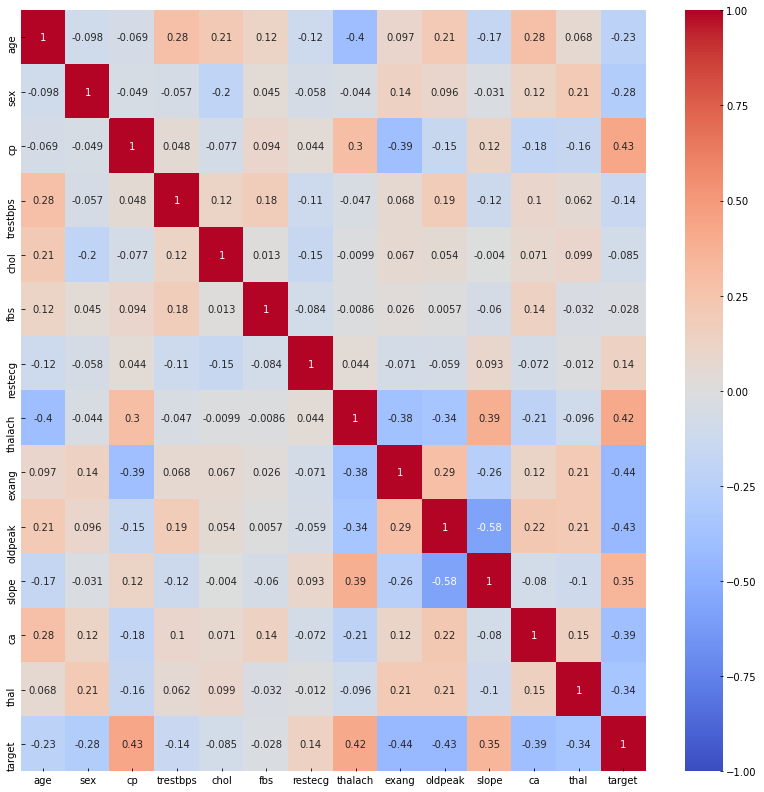

In [11]:
corr = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

Color control: https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/

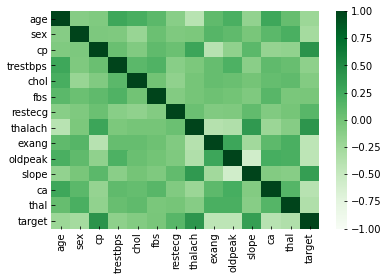

In [12]:
sns.heatmap(corr, vmin = -1, vmax = 1, cmap = 'Greens')

Dataset: https://www.kaggle.com/ronitf/heart-disease-uci

"Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health."

So, we will use 'target' column as our predicted variable.

# Features and target

In [13]:
# use the dataframe variable to create an array with the columns names 
all_vars = np.array(df.columns)
all_vars

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [14]:
# define features
features = np.array(all_vars[0:13])
features

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [15]:
# define target
target = np.array(all_vars[13])
target

array('target', dtype='<U6')

# Splitting

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.2,
                                                      stratify = df[target], random_state = 0)

# Models

In [17]:
# defining variable to store the results
all_models = []
all_scores = []

## Support Vector Machine

Link for documentation:
https://scikit-learn.org/stable/modules/svm.html

In [18]:
from sklearn.svm import LinearSVC

In [19]:
def svm_test(X_train, y_train, cv = 10):
  np.random.seed(0)
  svc = LinearSVC(random_state=0)
  cv_scores = cross_val_score(svc, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  print('Average of', cv, 'tests: ', cv_scores.mean())
  return cv_scores.mean()

In [20]:
res = svm_test(X_train, y_train)

Average of 10 tests:  0.7436666666666667


In [21]:
# updating results 
all_models = np.append(all_models, "SVC")
all_scores = np.append(all_scores, round(res, 4))

In [22]:
all_models, all_scores

(array(['SVC'], dtype='<U32'), array([0.7437]))

## Random Forest

Link for documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
def rfc_test(X_train, y_train, n_estimators = 100, cv = 10):
  np.random.seed(0)
  rfc = RandomForestClassifier(n_estimators = n_estimators, random_state = 0, n_jobs = -1)
  cv_scores = cross_val_score(rfc, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  print('Average of', cv, 'tests: ', cv_scores.mean())
  return cv_scores.mean()

In [25]:
res = rfc_test(X_train, y_train)

Average of 10 tests:  0.8098333333333333


In [26]:
# updating results 
all_models = np.append(all_models, "RFC")
all_scores = np.append(all_scores, round(res, 4))

## XGBClassifier

Link for documentation: https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [27]:
from xgboost import XGBClassifier

In [28]:
def xgb_test(X_train, y_train, n_estimators = 100, cv = 10):
  np.random.seed(0)
  xgb = XGBClassifier(n_estimators = n_estimators, random_state = 0, n_jobs = -1)
  cv_scores = cross_val_score(xgb, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  print('Average of', cv, 'tests: ', cv_scores.mean())
  return cv_scores.mean()

In [29]:
res = xgb_test(X_train, y_train)

Average of 10 tests:  0.8015000000000001


In [30]:
# updating results 
all_models = np.append(all_models, "XGB")
all_scores = np.append(all_scores, round(res, 4))

## Multi-Layer Perceptron

Link for documentation: https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [32]:
def mlp_test(X_train, y_train, cv = 10):
  np.random.seed(0)

  mlp = MLPClassifier(random_state=0)
  scaler = StandardScaler()
  pipe = Pipeline([('scaler', scaler), ('mlp', mlp)])

  cv_scores = cross_val_score(pipe, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  print('Average of', cv,  'tests: ', cv_scores.mean())
  return cv_scores.mean()

In [33]:
res = mlp_test(X_train, y_train)

Average of 10 tests:  0.8018333333333333


In [34]:
# updating results 
all_models = np.append(all_models, "MLP")
all_scores = np.append(all_scores, round(res, 4))

# Fit model

## Random Forest

In [35]:
# fitting/training only for all the features case, since it has proven to show better results
model = RandomForestClassifier(random_state = 0, n_jobs = -1)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [36]:
predictions = model.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
print("Results for test data: Random Forest trained", round(score, 4))

Results for test data: Random Forest trained 0.8525


In [37]:
# updating results 
all_models = np.append(all_models, "RFC trained")
all_scores = np.append(all_scores, score)

In [38]:
cm_rfc = confusion_matrix(predictions, y_test)
cm_rfc

array([[23,  4],
       [ 5, 29]])

## XGB

In [39]:
model2 = XGBClassifier(random_state = 0, n_jobs = -1)
model2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
predictions = model2.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
print("Results for test data: XGB trained", score)

Results for test data: XGB trained 0.819672131147541


In [41]:
# updating results 
all_models = np.append(all_models, "XGB trained")
all_scores = np.append(all_scores, round(score, 4))

# Hyper Parameter Optimization

In [42]:
from sklearn.model_selection import RandomizedSearchCV

## Define parameter dictionary and distribution

Link for RandomizedSearchCV documentation

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

As an example, we will experiment optmizing the RandomForestClassifier model with two models: RandomForestClassifier and XGBClassifier.

In [43]:
# parameters dictionary for RFC
# check documentation for RFC

params_rfc = {
 "n_estimators"             : [50, 100, 150, 200],
 "min_samples_leaf"         : [1, 2, 3, 4, 5],
 "min_weight_fraction_leaf" : [0.00, 0.05, 0.10, 0.15, 0.20],
 "random_state"             : [0],
 "n_jobs"                   : [-1]
}

In [44]:
# parameters dictionary for XGB
# check documentation for XGB

params_xgb = {
 "n_estimators"     : [100, 150, 200, 250],
 "learning_rate"    : [0.50, 0.6, 0.7, 0.8, 0.9],
 "max_depth"        : [3, 5, 8, 10, 12],
 "gamma"            : [0.5, 0.7, 0.8, 0.9],
 "colsample_bytree" : [0.3, 0.5, 0.60, 0.80, 0.90, 0.95],
 "random_state"     : [0],
 "n_jobs"           : [-1]
}

## Optimizing RFC

In [45]:
# optimizing rfc (Random Forest Classifier)
random_search_rfc = RandomizedSearchCV(RandomForestClassifier(),
                                       param_distributions = params_rfc,
                                       scoring = 'accuracy',
                                       n_jobs = -1,
                                       random_state = 0,
                                       cv=10)

random_search_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [46]:
# Random Search score for the training data
random_search_rfc.score(X_train,y_train)

0.8842975206611571

In [47]:
# optimized RFC model
random_search_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.05, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [48]:
# optimized RFC parameters
random_search_rfc.best_params_

{'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.05,
 'n_estimators': 150,
 'n_jobs': -1,
 'random_state': 0}

In [49]:
# average score of 3 folds for the best estimator
random_search_rfc.best_score_

0.8346666666666668

In [50]:
# cv score for the optimized RFC model
opt_rfc = random_search_rfc.best_estimator_

score = cross_val_score(opt_rfc, X_train, y_train, cv = 10)
print("Cross Validation score for Optimized Random Forest", score.mean())
# parameter optimization increased the CV_score of RFC model, calculated using the training data

Cross Validation score for Optimized Random Forest 0.8346666666666668


In [51]:
# updating results 
all_models = np.append(all_models, "RFC opt")
all_scores = np.append(all_scores, round(score.mean(), 4))

In [52]:
# predict on test data
predictions = opt_rfc.predict(X_test)

# evaluate results
score = metrics.accuracy_score(y_test, predictions)
print("Results for test data: Random Forest Optimized and trained", score)

# but the accuracy on new data (test data) actually decreased
# this case when the aacuracy increases on the train data but decreases on the test data
# is called Overfitting

Results for test data: Random Forest Optimized and trained 0.819672131147541


In [53]:
# updating results 
all_models = np.append(all_models, "RFC opt (val acc)")
all_scores = np.append(all_scores, round(score, 4))

In [54]:
cm_rfc_opt = confusion_matrix(predictions, y_test)
cm_rfc_opt

array([[22,  5],
       [ 6, 28]])

## Optimizing XGBClassifier

In [55]:
# optimizing xgb (XGB Classifier)
random_search_xgb = RandomizedSearchCV(XGBClassifier(),
                                       param_distributions = params_xgb,
                                       scoring = 'accuracy',
                                       n_jobs = -1,
                                       random_state = 0,
                                       cv=10)

random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.6, 0.8,
                                     

In [56]:
# Random Search score for the training data
random_search_xgb.score(X_train, y_train)

0.9958677685950413

In [57]:
# optimized XGB model
random_search_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.8,
              learning_rate=0.6, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [58]:
# optimized XGB parameters
random_search_xgb.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.8,
 'learning_rate': 0.6,
 'max_depth': 10,
 'n_estimators': 150,
 'n_jobs': -1,
 'random_state': 0}

In [59]:
# average score of 3 folds for the best estimator
random_search_xgb.best_score_

0.8431666666666666

In [60]:
# cv score for the optimized RFC model
opt_xgb = random_search_xgb.best_estimator_

score = cross_val_score(opt_xgb, X_train, y_train, cv = 10)
print("Cross Validation score for Optimized XGB", score.mean())
# parameter optimization increased the CV_score of XGB model, calculated using the training data

Cross Validation score for Optimized XGB 0.8431666666666666


In [61]:
# updating results 
all_models = np.append(all_models, "XGB opt")
all_scores = np.append(all_scores, round(score.mean(), 4))

In [62]:
# predict on test data
predictions = opt_xgb.predict(X_test)

# evaluate results
score = metrics.accuracy_score(y_test, predictions)
print("Results for test data: XGB Optimized and trained", score)

# For the XGB model the optimization really improved its accuracy.
# Predicting on new data, it's now on the same performance level 
# than the Random Forest model non-optimized.

Results for test data: XGB Optimized and trained 0.8524590163934426


In [63]:
# updating results 
all_models = np.append(all_models, "XGB opt (val acc)")
all_scores = np.append(all_scores, round(score, 4))

In [64]:
cm_xgb_opt = confusion_matrix(predictions, y_test)
cm_xgb_opt

array([[23,  4],
       [ 5, 29]])

# Results

In [65]:
all_models, all_scores

(array(['SVC', 'RFC', 'XGB', 'MLP', 'RFC trained', 'XGB trained',
        'RFC opt', 'RFC opt (val acc)', 'XGB opt', 'XGB opt (val acc)'],
       dtype='<U32'),
 array([0.7437    , 0.8098    , 0.8015    , 0.8018    , 0.85245902,
        0.8197    , 0.8347    , 0.8197    , 0.8432    , 0.8525    ]))

<Figure size 720x432 with 0 Axes>

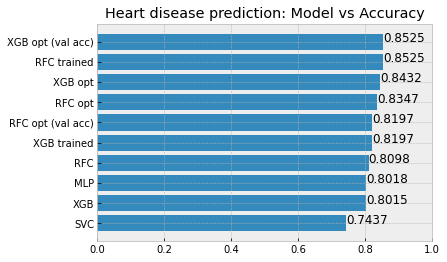

In [66]:
argsort = np.argsort(all_scores)
all_scores_sorted = all_scores[argsort]

all_models_names = all_models
all_models_sorted = all_models_names[argsort]

plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
ax.barh(all_models_sorted, all_scores_sorted)
plt.xlim(0, 1)
plt.title("Heart disease prediction: Model vs Accuracy")
for index, value in enumerate(all_scores_sorted):
    plt.text(value, index, str(round(value, 4)), fontsize = 12)

# Conclusions

For this heart disease prediction problem it's possible to achieve accuracies above 85 % when predicting in new data.